# 1. Import Modules

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
%matplotlib inline
import mdtraj as md
import dmaps
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

# 2. Load Takens' embedded files

In [2]:
M = np.loadtxt('EBD.txt')

In [3]:
gt1 = np.loadtxt('gt1ebd.txt')
gt2 = np.loadtxt('gt2ebd.txt')
gt3 = np.loadtxt('gt3ebd.txt')

# 3. Eliminate time symmetry

In [4]:
EBDdata = M[:20000,:]

In [5]:
fliplrEBD = np.zeros(EBDdata.shape)
fliplrEBD = np.fliplr(EBDdata)

In [5]:
distEBDdata = dmaps.DistanceMatrix(EBDdata.reshape(-1,20*1))
distEBDdata.compute(metric=dmaps.metrics.euclidean)

In [7]:
distfliplrEBD = dmaps.DistanceMatrix(fliplrEBD.reshape(-1,20*1))
distfliplrEBD.compute(metric=dmaps.metrics.euclidean)

In [8]:
dist_EBDdata = distEBDdata.get_distances()

In [9]:
dist_flpiEBD = distfliplrEBD.get_distances()

In [10]:
optimizeddata = np.zeros((20000-38,20000-38))

In [11]:
for i in range(optimizeddata.shape[0]):  
    for j in range(optimizeddata.shape[0]):
        
        optimizeddata[i,j] = min(dist_flpiEBD[i,j],dist_EBDdata[i,j])

In [13]:
np.savetxt('symmetry removed ebd.txt',optimizeddata)

In [7]:
optimizeddata=np.loadtxt('symmetry removed ebd.txt')

In [8]:
dmap = dmaps.DiffusionMap(optimizeddata)

In [ ]:
epss = 2.**np.arange(-4, 4, 1)
epssfig = plt.figure()

In [ ]:
aij = [dmap.sum_similarity_matrix(eps) for eps in epss]

In [ ]:
plt.semilogy(epss, aij)
plt.xlim([0, 8])

In [9]:
dmap.set_kernel_bandwidth(4)
dmap.compute(20)

In [10]:
vEBDdata = dmap.get_eigenvectors()
wEBDdata = dmap.get_eigenvalues()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


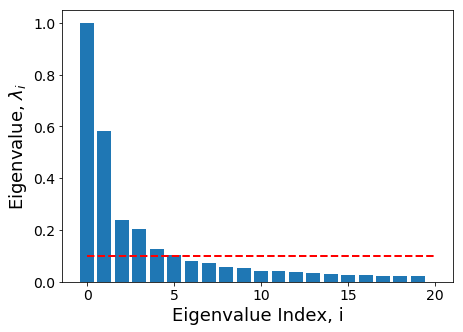

In [25]:
plt.figure(figsize=(7,5))
plt.bar(np.array(range(20)), wEBDdata)
ax = plt.subplot(1,1,1)
ax.set_xlabel('Eigenvalue Index, i',fontsize = 18)
ax.set_ylabel('Eigenvalue, $\lambda_i$',fontsize = 18)
ax.tick_params(labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.plot([-0,20], [0.1, 0.1], '--', lw=2,color = 'r')

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
im = ax.scatter(-vEBDdata[:,2], -vEBDdata[:,1], vEBDdata[:,3], c=gt1[:20000-38], marker='o')
ax.set_xlabel(r'$\Psi_3$',fontsize=18)
ax.set_ylabel(r'$\Psi_2$',fontsize=18)
ax.set_zlabel(r'$\Psi_4$',fontsize=18)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$\Xi_1$', rotation=90, fontsize=18)
plt.draw()
plt.show()

# 4. Nystrom Extension

In [14]:
nystrom_h2t = np.zeros((50001-38,20))

In [15]:
nystrom_h2t[:20000-38,:] = vEBDdata

In [16]:
dist_nystrom = dmaps.DistanceMatrix(M[:20000])

In [17]:
for i in range(20000-38,50001-38,1):
    nystrom_h2t[i,:] = dmap.nystrom(dist_nystrom.compute_single(M[i,:].reshape(-1),metric=dmaps.metrics.euclidean))

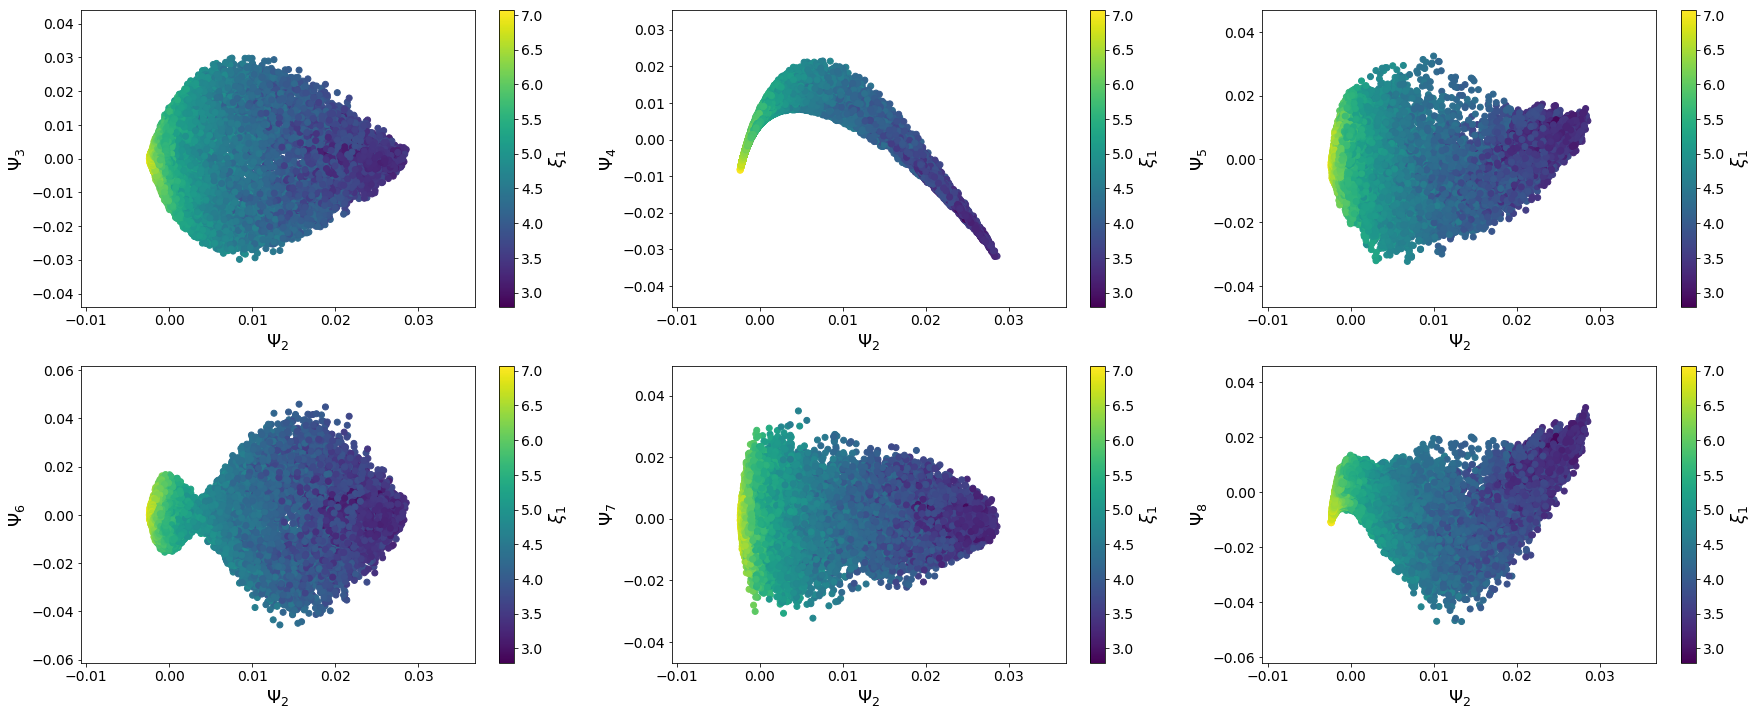

In [18]:
plt.figure(figsize=(30,12))
    # plotting trajectories 

ax1 = plt.subplot(2,3,1)
plt.scatter(nystrom_h2t[:,1], nystrom_h2t[:,2], c=gt1)
cbar = plt.colorbar()
plt.xlabel(r'$\Psi_2$',fontsize=18)
plt.ylabel(r'$\Psi_3$',fontsize=18)
ax1.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\xi_1$',fontsize=18)

ax2 = plt.subplot(2,3,2)
plt.scatter(nystrom_h2t[:,1], nystrom_h2t[:,3], c=gt1)
cbar = plt.colorbar()
plt.xlabel(r'$\Psi_2$',fontsize=18)
plt.ylabel(r'$\Psi_4$',fontsize=18)
ax2.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\xi_1$',fontsize=18)

ax3 = plt.subplot(2,3,3)
plt.scatter(nystrom_h2t[:,1], nystrom_h2t[:,4], c=gt1)
cbar = plt.colorbar()
plt.xlabel(r'$\Psi_2$',fontsize=18)
plt.ylabel(r'$\Psi_5$',fontsize=18)
ax3.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\xi_1$',fontsize=18)  

ax4 = plt.subplot(2,3,4)
plt.scatter(nystrom_h2t[:,1], nystrom_h2t[:,5], c=gt1)
cbar = plt.colorbar()
plt.xlabel(r'$\Psi_2$',fontsize=18)
plt.ylabel(r'$\Psi_6$',fontsize=18)
ax4.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\xi_1$',fontsize=18)

ax5 = plt.subplot(2,3,5)
plt.scatter(nystrom_h2t[:,1], nystrom_h2t[:,6], c=gt1)
cbar = plt.colorbar()
plt.xlabel(r'$\Psi_2$',fontsize=18)
plt.ylabel(r'$\Psi_7$',fontsize=18)
ax5.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\xi_1$',fontsize=18)

ax6 = plt.subplot(2,3,6)
plt.scatter(nystrom_h2t[:,1], nystrom_h2t[:,7], c=gt1)
cbar = plt.colorbar()
plt.xlabel(r'$\Psi_2$',fontsize=18)
plt.ylabel(r'$\Psi_8$',fontsize=18)
ax6.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\xi_1$',fontsize=18)

In [43]:
np.savetxt('h2t latent space.txt',nystrom_h2t[:,:7])

# 5. Free Energy space

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


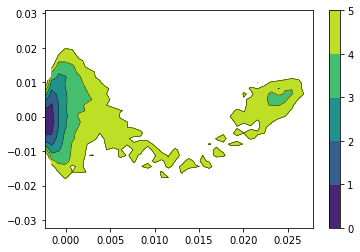

In [19]:
fig,ax = plt.subplots()
p, x, y = np.histogram2d(nystrom_h2t[:,1], nystrom_h2t[:,4], bins=40)
xg, yg = np.meshgrid(x[:-1],y[:-1])
#print(np.log(p));
f = -np.log(p.T)
f -= f.min()
vv = np.arange(0, 6, 1)
ax.contour(xg, yg, f, vv, linewidths=0.5, colors='k', extend='both');
im = ax.contourf(xg, yg, f, vv);
#plt.figure()
#plt.scatter(Baverjacobian[:,0], Baverjacobian[:,1], c=im)
#cbar = plt.colorbar()
#plt.xlabel("Y1")
#plt.ylabel("Y2")
plt.colorbar(im, ax =ax)

In [20]:
xcenters = (x[:-1] + x[1:]) / 2
ycenters = (y[:-1] + y[1:]) / 2

In [21]:
for i in range(40):
    for j in range(40):
        if f[i,j] == np.inf:
            f[i,j] = np.nan

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


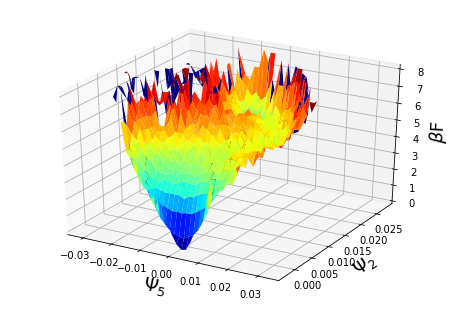

In [28]:
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.plot_surface(-yg,xg,f,cmap = 'jet', vmin=0, vmax=8)
ax.set_xlabel(r'$\Psi_5$',fontsize=18)
ax.set_ylabel(r'$\Psi_2$',fontsize=18)
ax.set_zlabel(r'$\beta$F',fontsize=18)
plt.show()